# Collecting the data using Twitter API and Analyzing the data.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import tweepy
import json
from tweepy import OAuthHandler

In [5]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Keys from the Twitter API
consumer_key = "LzsCOl12ZZ79FObx7BV9a1R3a"
consumer_secret = "gODxZ1kHJHDGgYfyP12AUN37UTlDd6yn3OsSV9Tl0iwu0K0cRY"
access_token = "296102538-kYIK8SULCmRK4vgvYD2DhKbwvSXrgTdTkWh0Nvsp"
access_token_secret = "Ib9obwgcE5tZk4S6tY5rAqI5iXOeJc9FGFg28qHoa4YpP"

In [3]:
# Authentication
auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [4]:
# Searching and getting the latest tweets about the query (Mumbai Indians will win IPL)
Tweets = api.search( "Mumbai Indians will win IPL" , count=10 , lang='en' , exclude='retweets' , tweet_mode='extended' )
for tweet in Tweets:
    print(tweet,"\n")
    print(".....................................\n")

Status(_api=<tweepy.api.API object at 0x0000013AA7E53508>, _json={'created_at': 'Tue Nov 03 14:02:12 +0000 2020', 'id': 1323626535530582017, 'id_str': '1323626535530582017', 'full_text': '@SunRisers SRH have a 7-8 win/loss record against MI in IPL. \n\nMI have beaten SRH in each of their last three matches played against them. \n\nIf SRH wins this match then they will go through otherwise KKR will go through if MI wins. \n\n#IPL2020 #SRHvMI\n\nLIVE: https://t.co/ci2oLZiVKC https://t.co/uhmu3up4mp', 'truncated': False, 'display_text_range': [11, 281], 'entities': {'hashtags': [{'text': 'IPL2020', 'indices': [234, 242]}, {'text': 'SRHvMI', 'indices': [243, 250]}], 'symbols': [], 'user_mentions': [{'screen_name': 'SunRisers', 'name': 'SunRisers Hyderabad', 'id': 989137039, 'id_str': '989137039', 'indices': [0, 10]}], 'urls': [{'url': 'https://t.co/ci2oLZiVKC', 'expanded_url': 'http://bit.ly/IPL20-SRHvsMI', 'display_url': 'bit.ly/IPL20-SRHvsMI', 'indices': [258, 281]}], 'media': [{'id': 13

In [5]:
# Get the tweets and some Attributes in a dataframe
df = pd.DataFrame(columns = ['Tweets' , 'User' , 'User_statuses_count' , 
                            'User_followers' , 'User_location' , 'User_verified' ,
                            'fav_count' , 'rt_count' , 'tweet_date'] )
print(df)

Empty DataFrame
Columns: [Tweets, User, User_statuses_count, User_followers, User_location, User_verified, fav_count, rt_count, tweet_date]
Index: []


In [6]:
# function to fetch data using tweepy.Cursor and store the data (Max=1000 records)
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, exclude='retweets', lang='en').items():
        print('Tweets:',i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'User_followers'] = tweet.user.followers_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'User_verified'] = tweet.user.verified
        df.loc[i, 'fav_count'] = tweet.favorite_count
        df.loc[i, 'rt_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        df.to_excel('{}.xlsx'.format(file_name))
        i = i+1
        if i == 1000:
            break
        else:
            pass

In [7]:
# Passing the search string and file name
stream(data=["Mumbai Indians will win IPL"] , file_name='MI_tweets')

In [8]:
df.head()

,Tweets,User,User_statuses_count,User_followers,User_location,User_verified,fav_count,rt_count,tweet_date
0,@SunRisers SRH have a 7-8 win/loss record agai...,Firstpost Sports,208546,441711,India,True,3,2,2020-11-03 14:02:12
1,@CoffeeCothas Mumbai indians will win win matc...,AYUSH SINGH RAJPUT,15,0,"मुंबई, भारत",False,0,0,2020-11-03 13:45:25
2,#IPL2020 #MIvSRH\n\nToss: SRH win the toss and...,The Field,147241,16190,Where sport happens.,True,3,5,2020-11-03 13:32:02
3,My favourite team is Mumbai Indians.And I am a...,Yash Khare,1601,265,"Farrukhabad-Fatehgarh, India",False,0,0,2020-11-03 13:10:57
4,Who will win? In this big battle of:\n\nBlue v...,Amit Paranjape,292731,58323,"Pune, India",True,129,9,2020-11-03 12:10:49


In [9]:
# Function for cleaning the tweets using regular expression.
import re
def clean_tweet(tweet):
    tweet = re.sub('@\w+',' ', tweet)             # remove @mentions
    tweet = re.sub('\w+:\/\/\S+', ' ', tweet)      # remove links://...
    tweet = re.sub('[^0-9a-zA-Z \t]', ' ', tweet) # remove punctuation
    return tweet.strip()

In [10]:
# Function to analyze the sentiments 
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [11]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Cleaning the tweets

df['clean_tweet'] = df['Tweets'].apply(lambda x : clean_tweet(x))
df[['Tweets', 'clean_tweet']].head()

,Tweets,clean_tweet
0,@SunRisers SRH have a 7-8 win/loss record agai...,SRH have a 7 8 win loss record against MI in I...
1,@CoffeeCothas Mumbai indians will win win matc...,Mumbai indians will win win match dear team C...
2,#IPL2020 #MIvSRH\n\nToss: SRH win the toss and...,IPL2020 MIvSRH Toss SRH win the toss and th...
3,My favourite team is Mumbai Indians.And I am a...,My favourite team is Mumbai Indians And I am a...
4,Who will win? In this big battle of:\n\nBlue v...,Who will win In this big battle of Blue vs ...


In [12]:
# Analyze the sentiments of the tweets
df['Sentiment'] = df['clean_tweet'].apply(lambda x : analyze_sentiment(x) )
df.head()

,Tweets,User,User_statuses_count,User_followers,User_location,User_verified,fav_count,rt_count,tweet_date,clean_tweet,Sentiment
0,@SunRisers SRH have a 7-8 win/loss record agai...,Firstpost Sports,208546,441711,India,True,3,2,2020-11-03 14:02:12,SRH have a 7 8 win loss record against MI in I...,Positive
1,@CoffeeCothas Mumbai indians will win win matc...,AYUSH SINGH RAJPUT,15,0,"मुंबई, भारत",False,0,0,2020-11-03 13:45:25,Mumbai indians will win win match dear team C...,Positive
2,#IPL2020 #MIvSRH\n\nToss: SRH win the toss and...,The Field,147241,16190,Where sport happens.,True,3,5,2020-11-03 13:32:02,IPL2020 MIvSRH Toss SRH win the toss and th...,Positive
3,My favourite team is Mumbai Indians.And I am a...,Yash Khare,1601,265,"Farrukhabad-Fatehgarh, India",False,0,0,2020-11-03 13:10:57,My favourite team is Mumbai Indians And I am a...,Positive
4,Who will win? In this big battle of:\n\nBlue v...,Amit Paranjape,292731,58323,"Pune, India",True,129,9,2020-11-03 12:10:49,Who will win In this big battle of Blue vs ...,Positive


In [13]:
# Count of Positive, Neutral, Negative Tweets
print('Positive tweets:', df[df.Sentiment == 'Positive'].shape[0])
print('Neutral tweets:',  df[df.Sentiment == 'Neutral'].shape[0])
print('Negative tweets:', df[df.Sentiment == 'Negative'].shape[0])

Positive tweets: 106
Neutral tweets: 9
Negative tweets: 0


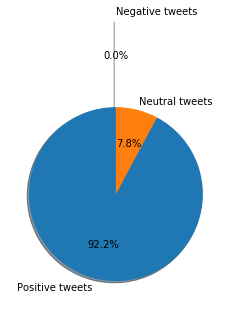

In [14]:
# Plotting the pie chart of the sentiments
import matplotlib.pyplot as plt
labels = 'Positive tweets', 'Neutral tweets', 'Negative tweets'
sizes = [df[df.Sentiment == 'Positive'].shape[0], df[df.Sentiment == 'Neutral'].shape[0], df[df.Sentiment == 'Negative'].shape[0]]
explode = (0, 0, 1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [15]:
# Analyze one specific record
n=0
print('\nOriginal tweet:\n', df['Tweets'][n])
print('\nCleaned tweet:\n',  df['clean_tweet'][n])
print('\nSentiment:\n',      df['Sentiment'][n])


Original tweet:
 @SunRisers SRH have a 7-8 win/loss record against MI in IPL. 

MI have beaten SRH in each of their last three match… https://t.co/Fqf7z5lPKd

Cleaned tweet:
 SRH have a 7 8 win loss record against MI in IPL    MI have beaten SRH in each of their last three match

Sentiment:
 Positive


In [16]:
# Analyze one specific record
n=5
print('\nOriginal tweet:\n', df['Tweets'][n])
print('\nCleaned tweet:\n',  df['clean_tweet'][n])
print('\nSentiment:\n',      df['Sentiment'][n])


Original tweet:
 @CoffeeCothas MUMBAI INDIANS will win the match
join @Som_TheBongGuy
 
@ajaysahoo1981
 
@blessedkamal… https://t.co/waM5mMXKWt

Cleaned tweet:
 MUMBAI INDIANS will win the match join

Sentiment:
 Positive


In [17]:
# Storing the cleaned and analyzed data in the excel file
df.to_excel('{}.xlsx'.format('MI_tweets'))